# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

# Problem 1: Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

In [1]:
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats
import random

mu = 12
sigma = 2
norm_data=np.random.normal(mu,sigma,10000);


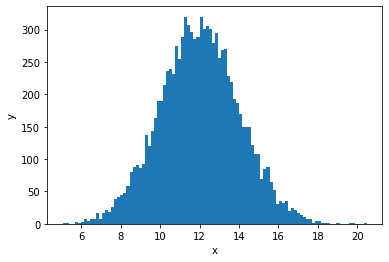

In [2]:
# Regular histogram of the data
scipy.stats.norm.pdf(norm_data,mu,sigma);
plt.hist(norm_data,bins = 100);
plt.xlabel('x');
plt.ylabel('y');

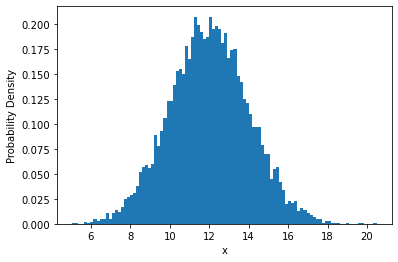

In [3]:
# Density plot of the data

plt.hist(norm_data,density = True,bins = 100);
plt.xlabel('x')
plt.ylabel('Probability Density');


Step 2: Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

In [4]:
t = np.zeros(1000);
for j in range(len(t)):
    sam = random.sample(list(norm_data),3); 
    xbar = np.sum(sam)/len(sam);
    s=np.std(sam,ddof=1);
    t[j] = (xbar-mu)/s;

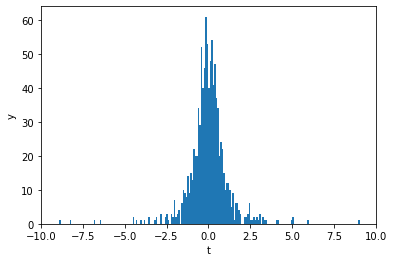

In [5]:
# Plotting the values on a normal histogram
plt.hist(t,bins=200);
plt.xlim([-10,10]);
plt.xlabel('t');
plt.ylabel('y');

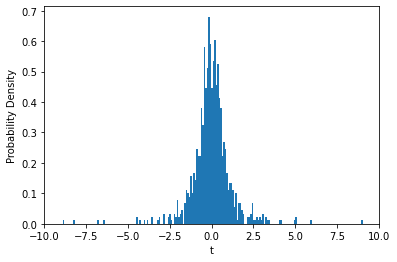

In [6]:
# Plotting the values on a probability density histogram
plt.hist(t,density = True,bins=200);
plt.xlim([-10,10]);
plt.xlabel('t');
plt.ylabel('Probability Density');

Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

In [7]:
meas = [9.45, 10.3, 11.];
xbar_meas = np.sum(meas)/len(meas);
s_meas = np.std(meas,ddof=1);
t_val = (xbar_meas-mu)/s_meas;
p_val = np.sum(t <= t_val)/len(t);
print('The odds of getting a t that is less than or equal to the measurement t is p_val =',p_val)

print('The same metric according to stats.ttest is',stats.ttest_1samp(meas,mu,alternative="less"))

The odds of getting a t that is less than or equal to the measurement t is p_val = 0.023
The same metric according to stats.ttest is Ttest_1sampResult(statistic=-3.9049920173544073, pvalue=0.029880068940888967)


# Problem 2: Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples from your normal distributions and the calculate t for each iteration. How do the density plots compare to the answer in Problem 1? Your answer must be clear.

In [8]:
t_2 = np.zeros(1000);
for j in range(len(t_2)):
    sam_2 = random.sample(list(norm_data),6); 
    xbar_2 = np.sum(sam_2)/len(sam_2);
    s_2=np.std(sam_2,ddof=1);
    t_2[j] = (xbar_2-mu)/s_2;

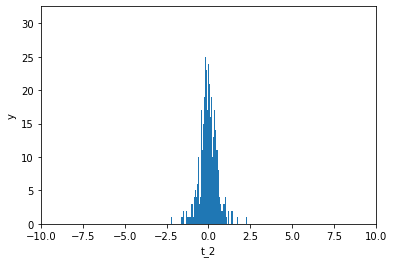

In [9]:
# Plotting the values on a normal histogram
plt.hist(t_2,bins=200);
plt.xlim([-10,10]);
plt.xlabel('t_2');
plt.ylabel('y');

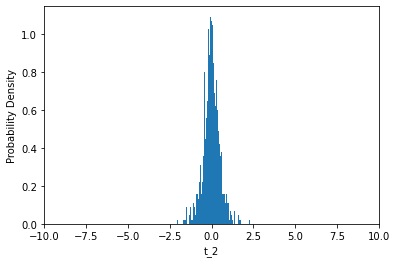

In [10]:
# Plotting the values on a probability density histogram
plt.hist(t_2,density = True,bins=100);
plt.xlim([-10,10]);
plt.xlabel('t_2');
plt.ylabel('Probability Density');

When taking three points in a sample population, the t distribution has a more spread-out shape while the distriution with six measurements is more compact. This is likely due to the idea where as you take more measurements for a sample population, the mean of the sample population will approach that of the overall population. The opposite of course happens as you take less measurements in a sample. Therefore, it makes sense that the t distribution would get more compact around t = 0 since the value of $\bar{x}-\mu$ gets closer to zero.

# Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values. Compare the t distribution to the t distribution estimated in Problem 1 and Comment.

In [11]:
mu_3 = 6;
sigma_3 = 3;
norm_data_3 = np.random.normal(mu_3,sigma_3,10000);

In [12]:
t_3 = np.zeros(1000);
for j in range(len(t_3)):
    sam_3 = random.sample(list(norm_data_3),3); 
    xbar_3 = np.sum(sam_3)/len(sam_3);
    s_3 = np.std(sam_3,ddof=1);
    t_3[j] = (xbar_3-mu_3)/s_3;

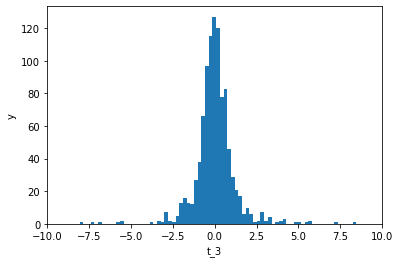

In [13]:
# Plotting the values on a normal histogram
plt.hist(t_3,bins=200);
plt.xlim([-10,10]);
plt.xlabel('t_3');
plt.ylabel('y');

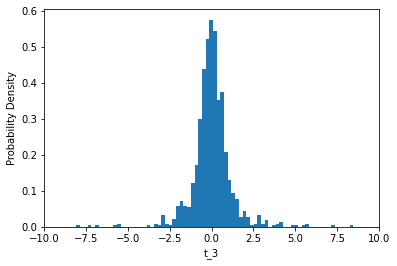

In [14]:
# Plotting the values on a probability density histogram
plt.hist(t_3,density = True,bins=200);
plt.xlim([-10,10]);
plt.xlabel('t_3');
plt.ylabel('Probability Density');

The t distribution in part 1 is mostly between -2.5 and 2.5, which is the same in this problem. The distribution in problem 1 is slightly more spread out over the mentioned range, while this one is slightly "tighter". However, that aspect can't be quantified to munch extent, so it is safer to say that the two parts have a very similar distribution. Therefore, it appears that changing the mean and standard deviation does not have a sizable impact on the t distributions of different populations. Rather, the number of sample population measurements has a much larger effect on the shape of the t distribution.

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: **The choice of n directly affects the shape of a population's t distribution, while the choice of $\mu$ and $\sigma$ have little to no noticable effect!**
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.